In [3]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input 
import pickle

with open('/kaggle/input/pre-processamentoa/imagens_redimensionadas.pkl', 'rb') as f:
    X = pickle.load(f)

with open('/kaggle/input/pre-processamentoa/y_orig_mod.pkl', 'rb') as f:
    Y = pickle.load(f)
    


In [25]:
from tensorflow.keras.applications.inception_v3 import preprocess_input 

In [5]:
import numpy as np
Y = Y.astype(np.float32)

AttributeError: 'list' object has no attribute 'astype'

In [6]:
X = np.array(X)

In [7]:
X.shape

(9947, 100, 100, 3)

In [8]:
print(np.min(X))
print(np.max(X))
X.shape

0
255


(9947, 100, 100, 3)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [10]:
del X, Y

In [11]:
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 4
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [14]:
X_train_ = X_train
X_test_ = X_test

In [12]:
# Verifica os valores mínimos e máximos após a normalização
print("X_test_normalized min:", np.min(X_test))
print("X_test_normalized max:", np.max(X_test))
print("X_train_normalized min:", np.min(X_train))
print("X_train_normalized max:", np.max(X_train))

# Verifica as formas dos arrays
print("X_test_normalized shape:", X_test.shape)
print("X_train_normalized shape:", X_train.shape)

X_test_normalized min: 0
X_test_normalized max: 255
X_train_normalized min: 0
X_train_normalized max: 255
X_test_normalized shape: (1990, 100, 100, 3)
X_train_normalized shape: (12916, 100, 100, 3)


In [13]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0: 6304, 1: 6612}
Distribuição no conjunto de teste
{0: 1562, 1: 428}


In [14]:
import numpy as np
import cv2

def aplicar_filtro_sobel_clahe(imagens):
    imagens_transformadas = np.zeros_like(imagens)
    # Cria o objeto CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    
    for i in range(len(imagens)):
        # Converte a imagem para escala de cinza
        cinza = cv2.cvtColor(imagens[i], cv2.COLOR_RGB2GRAY)
        
        # Aplica o filtro Sobel
        sobelx = cv2.Sobel(cinza, cv2.CV_64F, 1, 0, ksize=3)  # Sobel horizontal
        sobely = cv2.Sobel(cinza, cv2.CV_64F, 0, 1, ksize=3)  # Sobel vertical
        
        # Combina os gradientes
        sobel = np.hypot(sobelx, sobely)
        
        # Normaliza para 0 a 255
        sobel_norm = np.uint8(255 * (sobel / np.max(sobel)))
        
        # Aplica CLAHE
        sobel_clahe = clahe.apply(sobel_norm)
        
        # Reconverte para formato RGB (opcional, apenas para manter o formato original)
        imagens_transformadas[i] = cv2.cvtColor(sobel_clahe, cv2.COLOR_GRAY2RGB)
        
        
    
    return imagens_transformadas



In [15]:
X_train = aplicar_filtro_sobel_clahe(X_train)
X_test = aplicar_filtro_sobel_clahe(X_test)

In [16]:
import numpy as np

# Supondo que X_test e X_train são seus arrays de dados
# Normaliza o X_test entre 0 e 255
X_test_normalized = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test)) * 255
X_test_normalized = X_test_normalized.astype(np.uint8)

# Normaliza o X_train entre 0 e 255
X_train_normalized = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train)) * 255
X_train_normalized = X_train_normalized.astype(np.uint8)

# Verifica os valores mínimos e máximos após a normalização
print("X_test_normalized min:", np.min(X_test_normalized))
print("X_test_normalized max:", np.max(X_test_normalized))
print("X_train_normalized min:", np.min(X_train_normalized))
print("X_train_normalized max:", np.max(X_train_normalized))

# Verifica as formas dos arrays
print("X_test_normalized shape:", X_test_normalized.shape)
print("X_train_normalized shape:", X_train_normalized.shape)

X_train = X_train_normalized
X_test = X_test_normalized

X_test_normalized min: 0
X_test_normalized max: 255
X_train_normalized min: 0
X_train_normalized max: 255
X_test_normalized shape: (1990, 100, 100, 3)
X_train_normalized shape: (12916, 100, 100, 3)


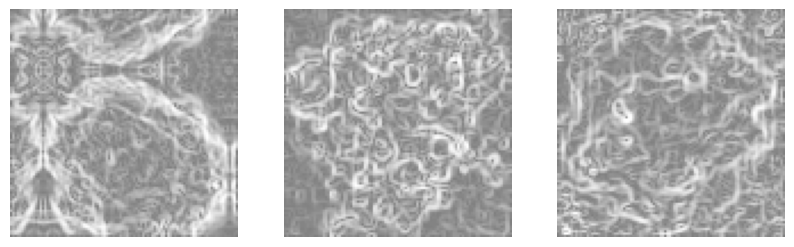

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((X_train[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [19]:
X_test = preprocess_input(X_test)
X_train = preprocess_input(X_train)

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

def create_InceptionV3():
    base_model = InceptionV3(input_shape=(100, 100, 3), include_top=False, weights='imagenet')
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
def train_model(model, X_train, Y_train, EPOCHS=25):
    early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1,
                           mode='auto', restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,
                              verbose=1, mode='auto')

    history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size = 16,
                        epochs = EPOCHS,
                        callbacks = [reduce_lr, early_stop])
    return history

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
  8/646 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4200 - loss: 1.1179  

I0000 00:00:1722638857.171459     139 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722638857.216611     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5716 - loss: 0.7701

W0000 00:00:1722638884.646484     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 58s 56ms/step - accuracy: 0.5717 - loss: 0.7700 - val_accuracy: 0.6409 - val_loss: 0.6565 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6480 - loss: 0.6381 - val_accuracy: 0.6583 - val_loss: 0.6182 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6685 - loss: 0.6167 - val_accuracy: 0.6792 - val_loss: 0.6086 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6848 - loss: 0.5984 - val_accuracy: 0.6695 - val_loss: 0.6169 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6851 - loss: 0.5983 - val_accuracy: 0.6637 - val_loss: 0.6155 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6880 - loss: 0.5941 - val_accuracy: 0.6753 - val_loss: 0.6087 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7010 - loss: 0.5785

W0000 00:00:1722639030.119636     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5871 - loss: 0.7501

W0000 00:00:1722639053.525768     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.5872 - loss: 0.7501 - val_accuracy: 0.6556 - val_loss: 0.6290 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6402 - loss: 0.6464 - val_accuracy: 0.6579 - val_loss: 0.6172 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6615 - loss: 0.6180 - val_accuracy: 0.6745 - val_loss: 0.6100 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6725 - loss: 0.6016 - val_accuracy: 0.6668 - val_loss: 0.6093 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6820 - loss: 0.5990 - val_accuracy: 0.6672 - val_loss: 0.6118 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6856 - loss: 0.5900 - val_accuracy: 0.6749 - val_loss: 0.6050 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7013 - loss: 0.5796

W0000 00:00:1722639226.172331     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5816 - loss: 0.7728

W0000 00:00:1722639249.700500     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.5817 - loss: 0.7727 - val_accuracy: 0.6517 - val_loss: 0.6345 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6315 - loss: 0.6544 - val_accuracy: 0.6683 - val_loss: 0.6164 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6685 - loss: 0.6121 - val_accuracy: 0.6749 - val_loss: 0.6134 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6697 - loss: 0.6048 - val_accuracy: 0.6703 - val_loss: 0.6045 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6916 - loss: 0.5850 - val_accuracy: 0.6703 - val_loss: 0.6091 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6938 - loss: 0.5851 - val_accuracy: 0.6672 - val_loss: 0.6147 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6932 - loss: 0.5841

W0000 00:00:1722639400.098845     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5829 - loss: 0.7614

W0000 00:00:1722639423.669843     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.5829 - loss: 0.7613 - val_accuracy: 0.6703 - val_loss: 0.6151 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6510 - loss: 0.6362 - val_accuracy: 0.6703 - val_loss: 0.6132 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6583 - loss: 0.6196 - val_accuracy: 0.6529 - val_loss: 0.6188 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6806 - loss: 0.6011 - val_accuracy: 0.6683 - val_loss: 0.6094 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6918 - loss: 0.5908 - val_accuracy: 0.6664 - val_loss: 0.6158 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6951 - loss: 0.5911 - val_accuracy: 0.6567 - val_loss: 0.6078 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6978 - loss: 0.5808

W0000 00:00:1722639616.599895     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5882 - loss: 0.7643

W0000 00:00:1722639640.172838     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.5882 - loss: 0.7642 - val_accuracy: 0.6610 - val_loss: 0.6201 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6419 - loss: 0.6442 - val_accuracy: 0.6711 - val_loss: 0.6115 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6666 - loss: 0.6159 - val_accuracy: 0.6695 - val_loss: 0.6150 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6755 - loss: 0.6043 - val_accuracy: 0.6730 - val_loss: 0.6113 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6940 - loss: 0.5858 - val_accuracy: 0.6494 - val_loss: 0.6214 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6946 - loss: 0.5836 - val_accuracy: 0.6614 - val_loss: 0.6185 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6955 - loss: 0.5812

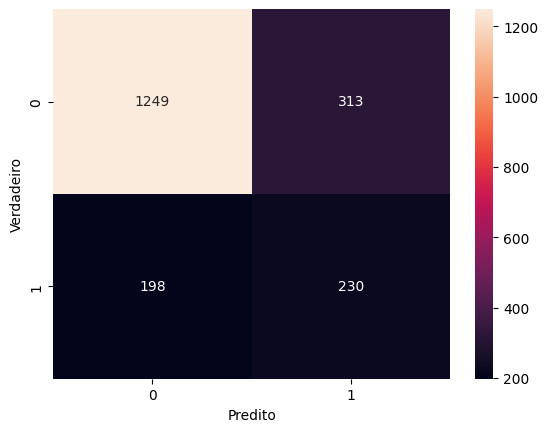

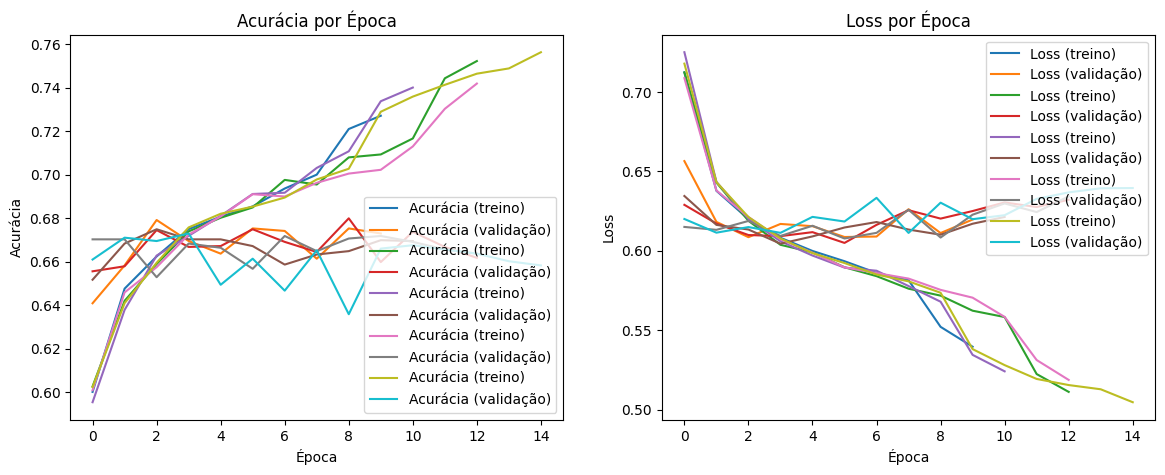

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []

for i in range(5):
    tf.keras.backend.clear_session()
    model = create_InceptionV3()
    historys.append(train_model(model, X_train, Y_train, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão Classe 1: {precisao_classe_1}")
    print(f"Recall Classe 1: {recall_classe_1}")
    print(f"F1-Score Classe 1: {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [23]:
del X_train, X_test, accuracies, precisions, recalls, f1_scores, historys

In [25]:
from tensorflow.keras.applications.inception_v3 import preprocess_input 
import pickle
with open('/kaggle/input/pre-processamentoa/imagens_redimensionadas.pkl', 'rb') as f:
    X = pickle.load(f)

with open('/kaggle/input/pre-processamentoa/y_orig_mod.pkl', 'rb') as f:
    Y = pickle.load(f)
    
from tensorflow.image import resize
X = np.array([resize(image, [100, 100]) for image in X])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 4
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [26]:
# Verifica os valores mínimos e máximos após a normalização
print("X_test_normalized min:", np.min(X_test))
print("X_test_normalized max:", np.max(X_test))
print("X_train_normalized min:", np.min(X_train))
print("X_train_normalized max:", np.max(X_train))

# Verifica as formas dos arrays
print("X_test_normalized shape:", X_test.shape)
print("X_train_normalized shape:", X_train.shape)

X_test_normalized min: 0.0
X_test_normalized max: 255.0
X_train_normalized min: 0.0
X_train_normalized max: 255.0
X_test_normalized shape: (1990, 100, 100, 3)
X_train_normalized shape: (12916, 100, 100, 3)


In [27]:
import numpy as np
import cv2

def aplicar_filtro_gabor(imagens, ksize=(15, 31), sigma=4.0, theta=0, lambd=10.0, gamma=0.5, psi=0):
    imagens_transformadas = np.zeros_like(imagens)
    # Cria o kernel de Gabor
    gabor_kernel = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
    
    for i in range(len(imagens)):
        # Converte a imagem para escala de cinza
        cinza = cv2.cvtColor(imagens[i], cv2.COLOR_RGB2GRAY)
        
        # Aplica o filtro de Gabor
        gabor = cv2.filter2D(cinza, cv2.CV_8UC3, gabor_kernel)
        
        # Reconverte para formato RGB (opcional, apenas para manter o formato original)
        imagens_transformadas[i] = cv2.cvtColor(gabor, cv2.COLOR_GRAY2RGB)
    
    return imagens_transformadas

# Suponha que 'imagens' seja o seu array de imagens de entrada
# imagens = np.array([...])  # Array de imagens 224x224x3 com valores entre 0 e 255
# imagens_filtradas = aplicar_filtro_gabor(imagens)


In [28]:
X_train = aplicar_filtro_gabor(X_train)
X_test = aplicar_filtro_gabor(X_test)

In [29]:
print(np.min(X_test))
print(np.max(X_test))
X_test.shape

0.0
255.0


(1990, 100, 100, 3)

In [30]:
# Verifica os valores mínimos e máximos após a normalização
print("X_test_normalized min:", np.min(X_test))
print("X_test_normalized max:", np.max(X_test))
print("X_train_normalized min:", np.min(X_train))
print("X_train_normalized max:", np.max(X_train))

# Verifica as formas dos arrays
print("X_test_normalized shape:", X_test.shape)
print("X_train_normalized shape:", X_train.shape)

X_test_normalized min: 0.0
X_test_normalized max: 255.0
X_train_normalized min: 0.0
X_train_normalized max: 255.0
X_test_normalized shape: (1990, 100, 100, 3)
X_train_normalized shape: (12916, 100, 100, 3)


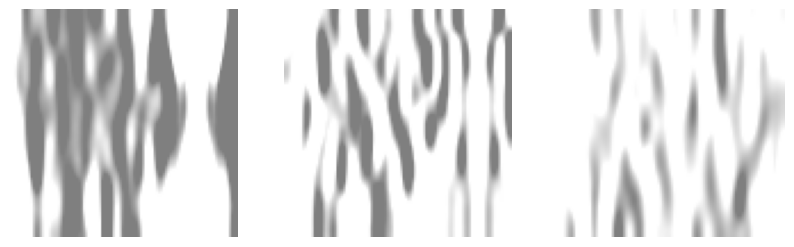

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((X_train[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [32]:
X_test = preprocess_input(X_test)
X_train = preprocess_input(X_train)

Epoch 1/30
 12/646 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5355 - loss: 0.8961 

W0000 00:00:1722640041.933298     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6144 - loss: 0.7458

W0000 00:00:1722640065.370817     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.6144 - loss: 0.7458 - val_accuracy: 0.6567 - val_loss: 0.6260 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6720 - loss: 0.6190 - val_accuracy: 0.6796 - val_loss: 0.5957 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6811 - loss: 0.6011 - val_accuracy: 0.6629 - val_loss: 0.6113 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6836 - loss: 0.5989 - val_accuracy: 0.6792 - val_loss: 0.5974 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6984 - loss: 0.5820 - val_accuracy: 0.6591 - val_loss: 0.6230 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6964 - loss: 0.5816 - val_accuracy: 0.6741 - val_loss: 0.6206 - learning_rate: 0.0010
Epoch 7/30
644/646 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7006 - loss: 0.5682


W0000 00:00:1722640194.665572     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6190 - loss: 0.7372

W0000 00:00:1722640218.247798     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.6190 - loss: 0.7371 - val_accuracy: 0.6567 - val_loss: 0.6239 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6628 - loss: 0.6211 - val_accuracy: 0.6633 - val_loss: 0.6070 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6779 - loss: 0.6020 - val_accuracy: 0.6726 - val_loss: 0.6014 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6880 - loss: 0.5973 - val_accuracy: 0.6579 - val_loss: 0.6252 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6928 - loss: 0.5880 - val_accuracy: 0.6738 - val_loss: 0.6011 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7036 - loss: 0.5749 - val_accuracy: 0.6652 - val_loss: 0.6170 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7087 - loss: 0.5710

W0000 00:00:1722640382.757404     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5987 - loss: 0.7432

W0000 00:00:1722640406.202043     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.5987 - loss: 0.7431 - val_accuracy: 0.6745 - val_loss: 0.6126 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6694 - loss: 0.6225 - val_accuracy: 0.6772 - val_loss: 0.6031 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6880 - loss: 0.5948 - val_accuracy: 0.6803 - val_loss: 0.6187 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6872 - loss: 0.5948 - val_accuracy: 0.6815 - val_loss: 0.6049 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6959 - loss: 0.5893 - val_accuracy: 0.6838 - val_loss: 0.6010 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7057 - loss: 0.5729 - val_accuracy: 0.6792 - val_loss: 0.6051 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7049 - loss: 0.5679

W0000 00:00:1722640568.871234     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6197 - loss: 0.7266

W0000 00:00:1722640592.248631     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 44ms/step - accuracy: 0.6197 - loss: 0.7265 - val_accuracy: 0.6664 - val_loss: 0.6085 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6685 - loss: 0.6158 - val_accuracy: 0.6722 - val_loss: 0.6085 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6755 - loss: 0.6048 - val_accuracy: 0.6776 - val_loss: 0.6038 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6930 - loss: 0.5817 - val_accuracy: 0.6772 - val_loss: 0.6132 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7090 - loss: 0.5744 - val_accuracy: 0.6881 - val_loss: 0.6057 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7038 - loss: 0.5788 - val_accuracy: 0.6823 - val_loss: 0.5988 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7052 - loss: 0.5668

W0000 00:00:1722640766.238171     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6224 - loss: 0.7387

W0000 00:00:1722640789.680362     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.6224 - loss: 0.7386 - val_accuracy: 0.6556 - val_loss: 0.6208 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6530 - loss: 0.6332 - val_accuracy: 0.6784 - val_loss: 0.5965 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6657 - loss: 0.6122 - val_accuracy: 0.6865 - val_loss: 0.6141 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6978 - loss: 0.5875 - val_accuracy: 0.6823 - val_loss: 0.6082 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7007 - loss: 0.5830 - val_accuracy: 0.6842 - val_loss: 0.6014 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7035 - loss: 0.5758 - val_accuracy: 0.6676 - val_loss: 0.6109 - learning_rate: 0.0010
Epoch 7/30
645/646 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7000 - loss: 0.5796


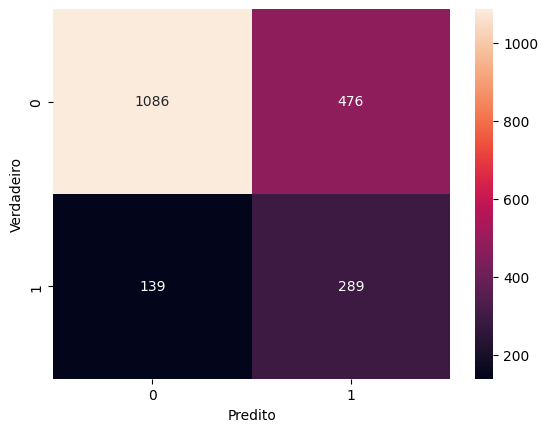

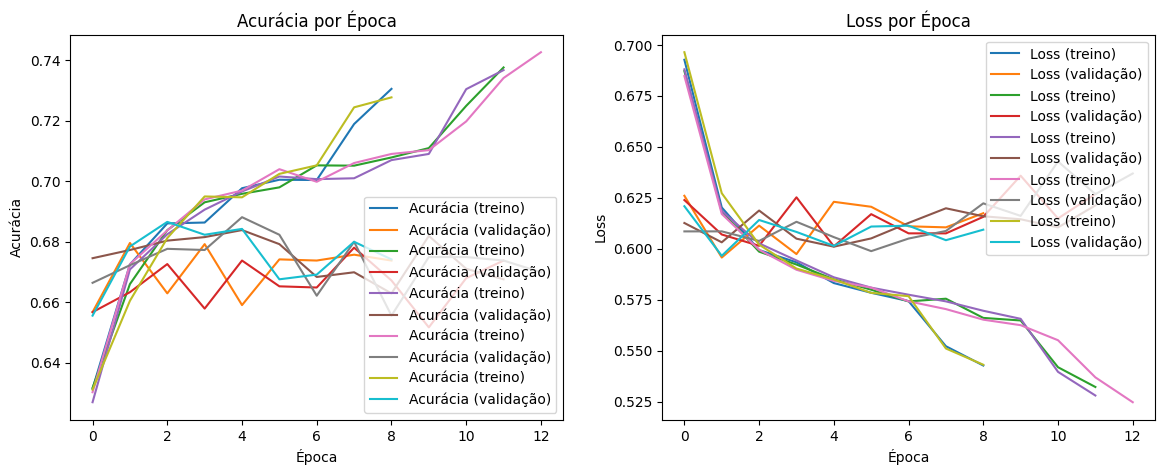

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []

for i in range(5):
    tf.keras.backend.clear_session()
    model = create_InceptionV3()
    historys.append(train_model(model, X_train, Y_train, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão Classe 1: {precisao_classe_1}")
    print(f"Recall Classe 1: {recall_classe_1}")
    print(f"F1-Score Classe 1: {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [35]:
del X_train, X_test, accuracies, precisions, recalls, f1_scores, historys

NameError: name 'X_train' is not defined

In [36]:
from tensorflow.keras.applications.inception_v3 import preprocess_input 
import pickle
with open('/kaggle/input/pre-processamentoa/imagens_redimensionadas.pkl', 'rb') as f:
    X = pickle.load(f)

with open('/kaggle/input/pre-processamentoa/y_orig_mod.pkl', 'rb') as f:
    Y = pickle.load(f)
    
from tensorflow.image import resize
X = np.array([resize(image, [100, 100]) for image in X])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 4
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [37]:
# Verifica os valores mínimos e máximos após a normalização
print("X_test_normalized min:", np.min(X_test))
print("X_test_normalized max:", np.max(X_test))
print("X_train_normalized min:", np.min(X_train))
print("X_train_normalized max:", np.max(X_train))

# Verifica as formas dos arrays
print("X_test_normalized shape:", X_test.shape)
print("X_train_normalized shape:", X_train.shape)

X_test_normalized min: 0.0
X_test_normalized max: 255.0
X_train_normalized min: 0.0
X_train_normalized max: 255.0
X_test_normalized shape: (1990, 100, 100, 3)
X_train_normalized shape: (12916, 100, 100, 3)


In [38]:
import numpy as np
import cv2
from scipy.signal import wiener

def aplicar_filtro_wiener(imagens):
    imagens_transformadas = np.zeros_like(imagens)
    
    for i in range(len(imagens)):
        # Converte a imagem para escala de cinza para simplificar o processamento
        cinza = cv2.cvtColor(imagens[i], cv2.COLOR_RGB2GRAY)
        
        # Aplica o filtro de Wiener
        filtrada = wiener(cinza, (3, 3))  # Ajuste o tamanho do kernel conforme necessário
        
        # Reconverte para formato RGB (opcional, apenas para manter o formato original)
        imagens_transformadas[i] = cv2.cvtColor(filtrada.astype(np.uint8), cv2.COLOR_GRAY2RGB)
    
    return imagens_transformadas

# Suponha que 'imagens' seja o seu array de imagens de entrada
# imagens = np.array([...])  # Array de imagens 224x224x3 com valores entre 0 e 255
# imagens_filtradas = aplicar_filtro_wiener(imagens)


In [39]:
X_train = aplicar_filtro_wiener(X_train)
X_test = aplicar_filtro_wiener(X_test)

In [41]:
print(np.min(X_test))
print(np.max(X_test))
X_test.shape

0.0
255.0


(1990, 100, 100, 3)

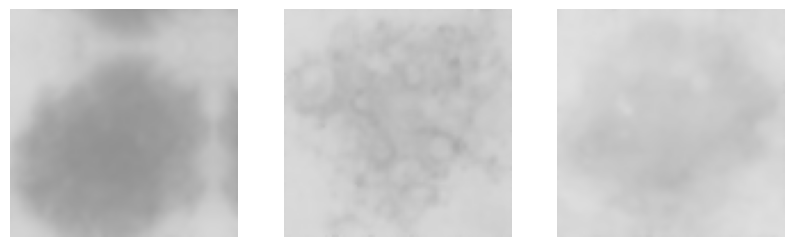

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((X_train[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [43]:
X_test = preprocess_input(X_test)
X_train = preprocess_input(X_train)

Epoch 1/30
 12/646 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4768 - loss: 1.0141 

W0000 00:00:1722641360.349063     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6091 - loss: 0.7421

W0000 00:00:1722641384.443009     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 47s 45ms/step - accuracy: 0.6091 - loss: 0.7420 - val_accuracy: 0.6575 - val_loss: 0.6216 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6778 - loss: 0.6090 - val_accuracy: 0.6827 - val_loss: 0.5958 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7071 - loss: 0.5663 - val_accuracy: 0.6811 - val_loss: 0.6005 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7184 - loss: 0.5518 - val_accuracy: 0.6873 - val_loss: 0.5911 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7279 - loss: 0.5430 - val_accuracy: 0.6896 - val_loss: 0.5961 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7365 - loss: 0.5283 - val_accuracy: 0.6916 - val_loss: 0.5939 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7514 - loss: 0.5209

W0000 00:00:1722641545.780695     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6096 - loss: 0.7367

W0000 00:00:1722641569.496281     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.6096 - loss: 0.7366 - val_accuracy: 0.6761 - val_loss: 0.6093 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6845 - loss: 0.6019 - val_accuracy: 0.6985 - val_loss: 0.5861 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7026 - loss: 0.5736 - val_accuracy: 0.7012 - val_loss: 0.5843 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7223 - loss: 0.5542 - val_accuracy: 0.6784 - val_loss: 0.5951 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7301 - loss: 0.5405 - val_accuracy: 0.6962 - val_loss: 0.5862 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7324 - loss: 0.5389 - val_accuracy: 0.6908 - val_loss: 0.6122 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7441 - loss: 0.5214

W0000 00:00:1722641721.553211     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6184 - loss: 0.7208

W0000 00:00:1722641745.379693     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 47s 45ms/step - accuracy: 0.6184 - loss: 0.7207 - val_accuracy: 0.6614 - val_loss: 0.6090 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6791 - loss: 0.6068 - val_accuracy: 0.6854 - val_loss: 0.5943 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7060 - loss: 0.5759 - val_accuracy: 0.6827 - val_loss: 0.5936 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7105 - loss: 0.5638 - val_accuracy: 0.6997 - val_loss: 0.5908 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7340 - loss: 0.5406 - val_accuracy: 0.6989 - val_loss: 0.5967 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7295 - loss: 0.5300 - val_accuracy: 0.6803 - val_loss: 0.6319 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7462 - loss: 0.5138

W0000 00:00:1722641898.797649     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6048 - loss: 0.7604

W0000 00:00:1722641922.417938     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.6048 - loss: 0.7603 - val_accuracy: 0.6854 - val_loss: 0.6304 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6708 - loss: 0.6152 - val_accuracy: 0.7012 - val_loss: 0.5873 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6935 - loss: 0.5843 - val_accuracy: 0.6889 - val_loss: 0.5946 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7161 - loss: 0.5559 - val_accuracy: 0.6900 - val_loss: 0.6010 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7247 - loss: 0.5441 - val_accuracy: 0.6997 - val_loss: 0.5953 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7426 - loss: 0.5274 - val_accuracy: 0.7016 - val_loss: 0.5831 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7466 - loss: 0.5130

W0000 00:00:1722642098.298281     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6067 - loss: 0.7777

W0000 00:00:1722642121.973792     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.6067 - loss: 0.7775 - val_accuracy: 0.6846 - val_loss: 0.6072 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6998 - loss: 0.5906 - val_accuracy: 0.6869 - val_loss: 0.5953 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7015 - loss: 0.5796 - val_accuracy: 0.6838 - val_loss: 0.5992 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7224 - loss: 0.5549 - val_accuracy: 0.6916 - val_loss: 0.6092 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7286 - loss: 0.5429 - val_accuracy: 0.6815 - val_loss: 0.5990 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7315 - loss: 0.5375 - val_accuracy: 0.6881 - val_loss: 0.5978 - learning_rate: 0.0010
Epoch 7/30
645/646 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7449 - loss: 0.5258


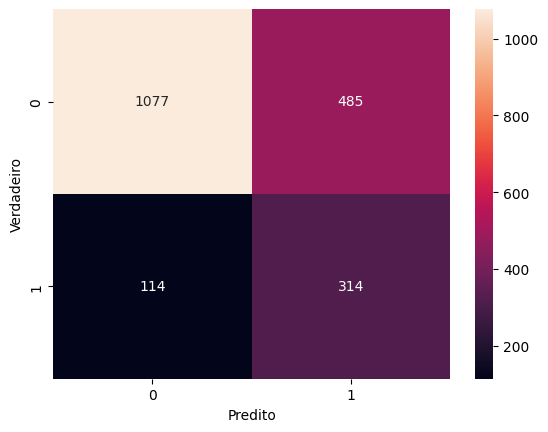

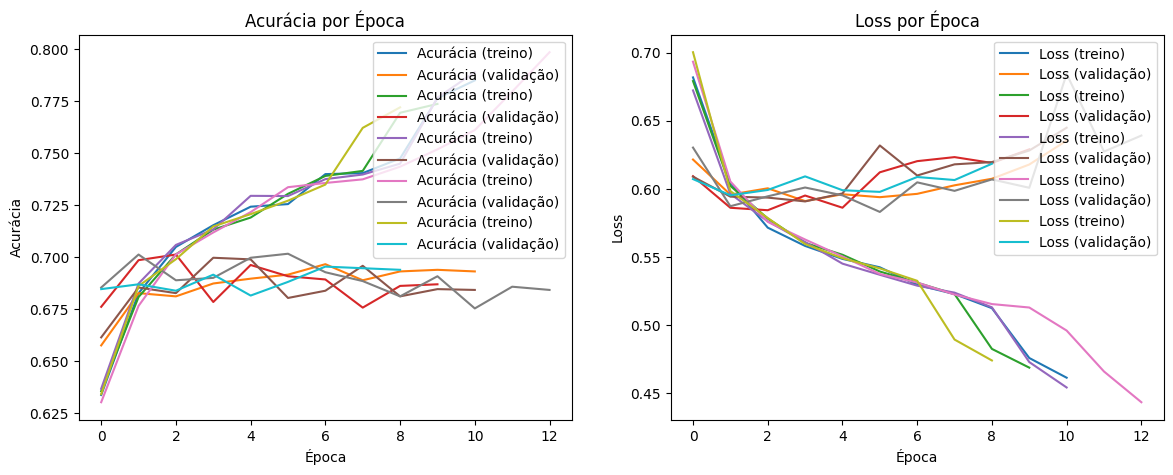

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []

for i in range(5):
    tf.keras.backend.clear_session()
    model = create_InceptionV3()
    historys.append(train_model(model, X_train, Y_train, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão Classe 1: {precisao_classe_1}")
    print(f"Recall Classe 1: {recall_classe_1}")
    print(f"F1-Score Classe 1: {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [45]:
del X_train, X_test, accuracies, precisions, recalls, f1_scores, historys

In [46]:
from tensorflow.keras.applications.inception_v3 import preprocess_input 
import pickle
with open('/kaggle/input/pre-processamentoa/imagens_redimensionadas.pkl', 'rb') as f:
    X = pickle.load(f)

with open('/kaggle/input/pre-processamentoa/y_orig_mod.pkl', 'rb') as f:
    Y = pickle.load(f)
    
from tensorflow.image import resize
X = np.array([resize(image, [100, 100]) for image in X])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 4
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [47]:
import numpy as np
import cv2
import pywt

def aplicar_wavelet_diagonal(imagens, wavelet='db1'):
    imagens_transformadas = np.zeros_like(imagens)
    
    for i in range(len(imagens)):
        # Converte a imagem para escala de cinza
        cinza = cv2.cvtColor(imagens[i], cv2.COLOR_RGB2GRAY)
        
        # Aplica a Transformada de Wavelet
        coeffs = pywt.wavedec2(cinza, wavelet=wavelet, level=1)
        cA, (cH, cV, cD) = coeffs  # cA = coeficiente de aproximação, cH = horizontal, cV = vertical, cD = diagonal
        
        # Normaliza o componente diagonal para o intervalo de 0 a 255
        cD_normalized = cv2.normalize(cD, None, 0, 255, cv2.NORM_MINMAX)
        
        # Redimensiona o componente diagonal para o tamanho original da imagem
        cD_resized = cv2.resize(cD_normalized, (imagens[i].shape[1], imagens[i].shape[0]), interpolation=cv2.INTER_LINEAR)
        
        # Convertendo de volta para 8-bit para compatibilidade com as imagens originais
        cD_resized = cD_resized.astype(np.uint8)
        
        # Reconverte para formato RGB (opcional, apenas para manter o formato original)
        imagens_transformadas[i] = cv2.cvtColor(cD_resized, cv2.COLOR_GRAY2RGB)
    
    return imagens_transformadas


In [48]:
X_train = aplicar_wavelet_diagonal(X_train)
X_test = aplicar_wavelet_diagonal(X_test)

In [49]:
print(np.min(X_test))
print(np.max(X_test))
X_test.shape

0.0
251.0


(1990, 100, 100, 3)

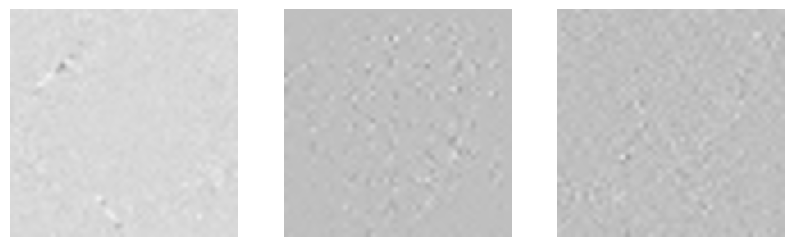

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((X_train[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()
X_test = preprocess_input(X_test)
X_train = preprocess_input(X_train)

In [51]:
X_test = preprocess_input(X_test)
X_train = preprocess_input(X_train)

Epoch 1/30
 12/646 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6039 - loss: 0.8235 

W0000 00:00:1722642358.568664     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5237 - loss: 0.8195

W0000 00:00:1722642382.054105     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.5237 - loss: 0.8195 - val_accuracy: 0.5317 - val_loss: 0.7084 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5449 - loss: 0.7078 - val_accuracy: 0.5530 - val_loss: 0.6894 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5455 - loss: 0.6952 - val_accuracy: 0.5321 - val_loss: 0.6954 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5517 - loss: 0.6882 - val_accuracy: 0.5499 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5581 - loss: 0.6850 - val_accuracy: 0.5627 - val_loss: 0.6874 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5697 - loss: 0.6804 - val_accuracy: 0.5430 - val_loss: 0.6959 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5767 - loss: 0.6770

W0000 00:00:1722642644.579141     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5132 - loss: 0.8234

W0000 00:00:1722642667.759693     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.5132 - loss: 0.8233 - val_accuracy: 0.5476 - val_loss: 0.7005 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5338 - loss: 0.7117 - val_accuracy: 0.5391 - val_loss: 0.6892 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5423 - loss: 0.6978 - val_accuracy: 0.5205 - val_loss: 0.7024 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5430 - loss: 0.6885 - val_accuracy: 0.5569 - val_loss: 0.7059 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5468 - loss: 0.6889 - val_accuracy: 0.5406 - val_loss: 0.6872 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5623 - loss: 0.6818 - val_accuracy: 0.5491 - val_loss: 0.6969 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5588 - loss: 0.6811

W0000 00:00:1722642965.713308     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5212 - loss: 0.8266

W0000 00:00:1722642989.816672     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 47s 46ms/step - accuracy: 0.5212 - loss: 0.8265 - val_accuracy: 0.5348 - val_loss: 0.6985 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5256 - loss: 0.7154 - val_accuracy: 0.5511 - val_loss: 0.6845 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5370 - loss: 0.6933 - val_accuracy: 0.5546 - val_loss: 0.6827 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5635 - loss: 0.6881 - val_accuracy: 0.5441 - val_loss: 0.6859 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5624 - loss: 0.6838 - val_accuracy: 0.5352 - val_loss: 0.6970 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5696 - loss: 0.6788 - val_accuracy: 0.5433 - val_loss: 0.6869 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5799 - loss: 0.6761

W0000 00:00:1722643242.515661     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5125 - loss: 0.8185

W0000 00:00:1722643265.839993     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 44ms/step - accuracy: 0.5125 - loss: 0.8184 - val_accuracy: 0.4923 - val_loss: 0.7582 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5329 - loss: 0.7106 - val_accuracy: 0.5306 - val_loss: 0.7047 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5500 - loss: 0.6895 - val_accuracy: 0.5731 - val_loss: 0.6809 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5631 - loss: 0.6882 - val_accuracy: 0.5774 - val_loss: 0.6800 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5552 - loss: 0.6838 - val_accuracy: 0.5271 - val_loss: 0.7054 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5692 - loss: 0.6785 - val_accuracy: 0.5352 - val_loss: 0.7069 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5616 - loss: 0.6823

W0000 00:00:1722643421.689211     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5207 - loss: 0.8193

W0000 00:00:1722643445.037030     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 46s 44ms/step - accuracy: 0.5207 - loss: 0.8192 - val_accuracy: 0.5631 - val_loss: 0.7107 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5327 - loss: 0.7087 - val_accuracy: 0.5503 - val_loss: 0.6900 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5451 - loss: 0.6943 - val_accuracy: 0.5786 - val_loss: 0.6776 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5591 - loss: 0.6896 - val_accuracy: 0.5317 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5537 - loss: 0.6868 - val_accuracy: 0.5569 - val_loss: 0.6966 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5746 - loss: 0.6823 - val_accuracy: 0.5178 - val_loss: 0.7185 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5623 - loss: 0.6810

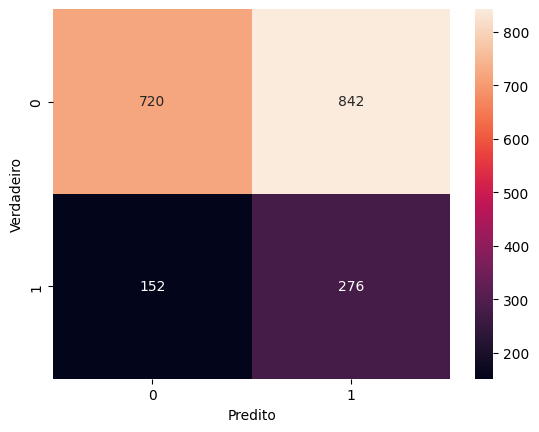

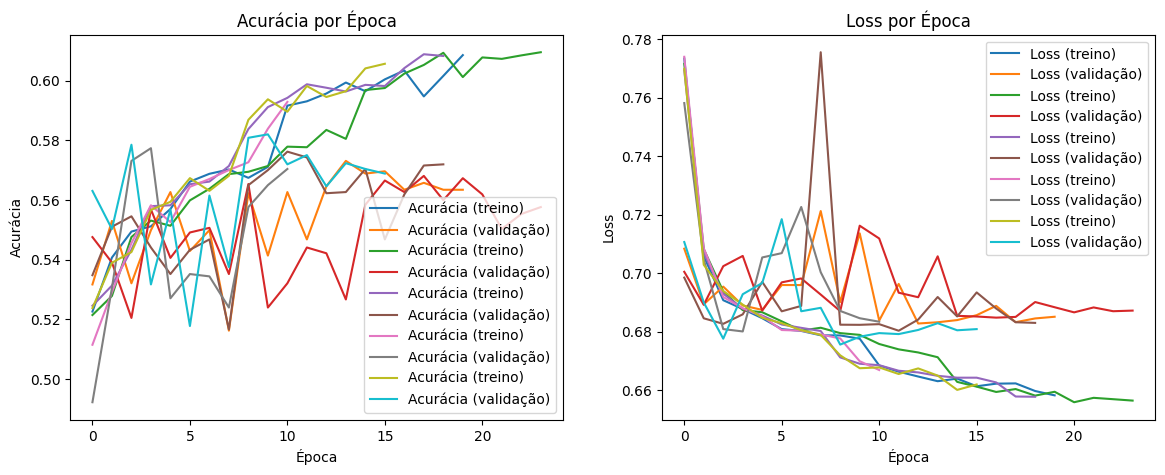

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []

for i in range(5):
    tf.keras.backend.clear_session()
    model = create_InceptionV3()
    historys.append(train_model(model, X_train, Y_train, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão Classe 1: {precisao_classe_1}")
    print(f"Recall Classe 1: {recall_classe_1}")
    print(f"F1-Score Classe 1: {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [129]:
del X_train, X_test, accuracies, precisions, recalls, f1_scores, historys

In [130]:
del X, Y 

In [ ]:
import gc

# Força a coleta de lixo
gc.collect()

In [2]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input 
import pickle
with open('/kaggle/input/pre-processamentoa/imagens_redimensionadas.pkl', 'rb') as f:
    X = pickle.load(f)

with open('/kaggle/input/pre-processamentoa/y_orig_mod.pkl', 'rb') as f:
    Y = pickle.load(f)
    
from tensorflow.image import resize
X = np.array([resize(image, [100, 100]) for image in X])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 4
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [3]:
import numpy as np
# Verifica os valores mínimos e máximos após a normalização
print("X_test_normalized min:", np.min(X_test))
print("X_test_normalized max:", np.max(X_test))
print("X_train_normalized min:", np.min(X_train))
print("X_train_normalized max:", np.max(X_train))

# Verifica as formas dos arrays
print("X_test_normalized shape:", X_test.shape)
print("X_train_normalized shape:", X_train.shape)

X_test_normalized min: 0.0
X_test_normalized max: 255.0
X_train_normalized min: 0.0
X_train_normalized max: 255.0
X_test_normalized shape: (1990, 100, 100, 3)
X_train_normalized shape: (12916, 100, 100, 3)


In [4]:
import numpy as np
import cv2

def aplicar_filtro_gaussiano(imagens, tamanho_kernel=(3, 3), sigma=0):
    # Cria um array vazio com o mesmo formato das imagens de entrada para armazenar as imagens transformadas
    imagens_transformadas = np.zeros_like(imagens)
    
    # Itera sobre cada imagem no array de entrada
    for i in range(len(imagens)):
        # Aplica o filtro Gaussiano na imagem atual
        filtrada = cv2.GaussianBlur(imagens[i], tamanho_kernel, sigma)
        
        # Armazena a imagem filtrada no array de imagens transformadas
        imagens_transformadas[i] = filtrada
    
    return imagens_transformadas

In [5]:
X_train = aplicar_filtro_gaussiano(X_train)
X_test = aplicar_filtro_gaussiano(X_test)

In [6]:
print(np.min(X_test))
print(np.max(X_test))
X_test.shape

0.0
255.0


(1990, 100, 100, 3)

In [18]:
# Supondo que X_test e X_train são seus arrays de dados
# Normaliza o X_test entre 0 e 255
X_test_normalized = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test)) * 255
X_test_normalized = X_test_normalized.astype(np.uint8)

# Normaliza o X_train entre 0 e 255
X_train_normalized = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train)) * 255
X_train_normalized = X_train_normalized.astype(np.uint8)

# Verifica os valores mínimos e máximos após a normalização
print("X_test_normalized min:", np.min(X_test_normalized))
print("X_test_normalized max:", np.max(X_test_normalized))
print("X_train_normalized min:", np.min(X_train_normalized))
print("X_train_normalized max:", np.max(X_train_normalized))

# Verifica as formas dos arrays
print("X_test_normalized shape:", X_test_normalized.shape)
print("X_train_normalized shape:", X_train_normalized.shape)

X_test = X_test_normalized
X_train = X_train_normalized

# Verifica as formas dos arrays
print("X_test_normalized shape:", X_test.shape)
print("X_train_normalized shape:", X_train.shape)

X_test_normalized min: 0
X_test_normalized max: 255
X_train_normalized min: 0
X_train_normalized max: 255
X_test_normalized shape: (2005, 100, 100, 3)
X_train_normalized shape: (13078, 100, 100, 3)


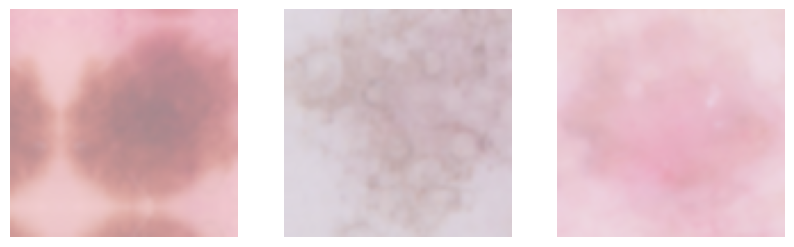

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((X_train[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [8]:
X_test = preprocess_input(X_test)
X_train = preprocess_input(X_train)

Epoch 1/30
  7/646 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5259 - loss: 0.8002 

I0000 00:00:1722648069.412306     130 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722648069.465467     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6447 - loss: 0.6936

W0000 00:00:1722648105.660706     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 76s 73ms/step - accuracy: 0.6448 - loss: 0.6935 - val_accuracy: 0.7009 - val_loss: 0.5766 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7187 - loss: 0.5485 - val_accuracy: 0.7291 - val_loss: 0.5395 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7346 - loss: 0.5279 - val_accuracy: 0.7132 - val_loss: 0.5604 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7588 - loss: 0.4914 - val_accuracy: 0.7245 - val_loss: 0.5379 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7645 - loss: 0.4954 - val_accuracy: 0.7241 - val_loss: 0.5410 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7583 - loss: 0.4890 - val_accuracy: 0.7272 - val_loss: 0.5378 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7741 - loss: 0.4737

W0000 00:00:1722648372.870465     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6475 - loss: 0.7198

W0000 00:00:1722648401.385262     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 56s 54ms/step - accuracy: 0.6475 - loss: 0.7197 - val_accuracy: 0.7012 - val_loss: 0.5885 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7170 - loss: 0.5607 - val_accuracy: 0.7264 - val_loss: 0.5461 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7406 - loss: 0.5176 - val_accuracy: 0.7283 - val_loss: 0.5322 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7542 - loss: 0.5051 - val_accuracy: 0.7272 - val_loss: 0.5399 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7559 - loss: 0.4907 - val_accuracy: 0.7283 - val_loss: 0.5420 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7728 - loss: 0.4777 - val_accuracy: 0.7229 - val_loss: 0.5563 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7703 - loss: 0.4705

W0000 00:00:1722648572.715798     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6673 - loss: 0.6729

W0000 00:00:1722648600.918604     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 55s 53ms/step - accuracy: 0.6673 - loss: 0.6728 - val_accuracy: 0.7121 - val_loss: 0.5678 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7217 - loss: 0.5529 - val_accuracy: 0.7264 - val_loss: 0.5366 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7406 - loss: 0.5191 - val_accuracy: 0.7159 - val_loss: 0.5541 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7580 - loss: 0.4979 - val_accuracy: 0.7214 - val_loss: 0.5413 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7645 - loss: 0.4889 - val_accuracy: 0.7101 - val_loss: 0.5739 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7677 - loss: 0.4821 - val_accuracy: 0.7144 - val_loss: 0.5795 - learning_rate: 0.0010
Epoch 7/30
645/646 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7746 - loss: 0.4767


W0000 00:00:1722648761.654833     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6490 - loss: 0.7058

W0000 00:00:1722648791.499623     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 58s 57ms/step - accuracy: 0.6491 - loss: 0.7057 - val_accuracy: 0.7094 - val_loss: 0.5621 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7104 - loss: 0.5688 - val_accuracy: 0.7198 - val_loss: 0.5434 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7369 - loss: 0.5258 - val_accuracy: 0.7194 - val_loss: 0.5375 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7607 - loss: 0.4998 - val_accuracy: 0.7283 - val_loss: 0.5351 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7676 - loss: 0.4902 - val_accuracy: 0.7245 - val_loss: 0.5431 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7775 - loss: 0.4722 - val_accuracy: 0.7171 - val_loss: 0.5648 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7841 - loss: 0.4654

W0000 00:00:1722649032.504086     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6584 - loss: 0.6853

W0000 00:00:1722649063.432361     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 60s 59ms/step - accuracy: 0.6585 - loss: 0.6852 - val_accuracy: 0.7059 - val_loss: 0.5659 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7147 - loss: 0.5576 - val_accuracy: 0.7171 - val_loss: 0.5420 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7290 - loss: 0.5331 - val_accuracy: 0.7252 - val_loss: 0.5440 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7566 - loss: 0.4976 - val_accuracy: 0.7233 - val_loss: 0.5445 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7571 - loss: 0.4946 - val_accuracy: 0.7163 - val_loss: 0.5709 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7703 - loss: 0.4817 - val_accuracy: 0.7140 - val_loss: 0.5569 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7751 - loss: 0.4698


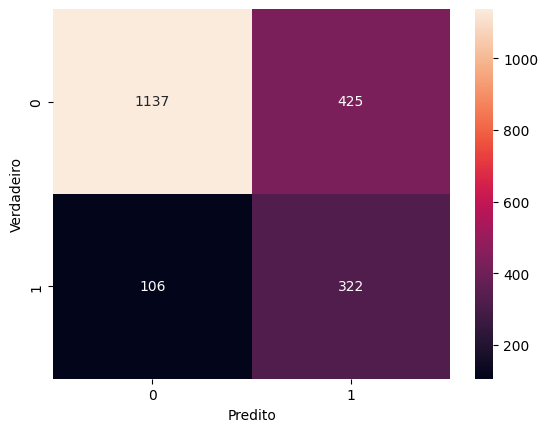

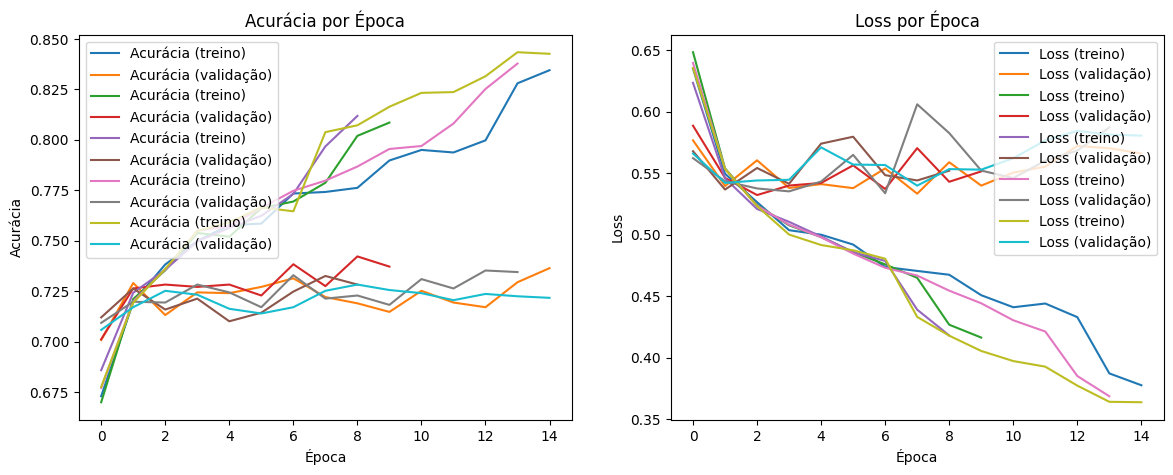

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []

for i in range(5):
    tf.keras.backend.clear_session()
    model = create_InceptionV3()
    historys.append(train_model(model, X_train, Y_train, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão Classe 1: {precisao_classe_1}")
    print(f"Recall Classe 1: {recall_classe_1}")
    print(f"F1-Score Classe 1: {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
del X_train, X_test, accuracies, precisions, recalls, f1_scores, historys

In [2]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input 
import pickle
with open('/kaggle/input/pre-processamentoa/imagens_redimensionadas.pkl', 'rb') as f:
    X = pickle.load(f)

with open('/kaggle/input/pre-processamentoa/y_orig_mod.pkl', 'rb') as f:
    Y = pickle.load(f)
    
from tensorflow.image import resize
X = np.array([resize(image, [100, 100]) for image in X])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 4
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [3]:
print(np.min(X_test))
print(np.max(X_test))
X_test.shape

0.0
255.0


(1990, 100, 100, 3)

In [18]:
X_test = preprocess_input(X_test)
X_train = preprocess_input(X_train)

In [4]:
print(np.min(X_test))
print(np.max(X_test))
X_test.shape

0.0
255.0


(1990, 100, 100, 3)

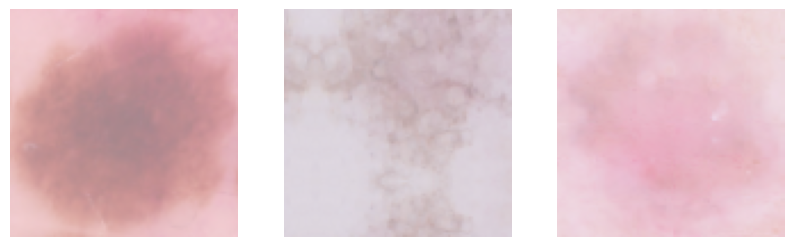

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((X_train[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()

Epoch 1/30
 10/646 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.4594 - loss: 1.0297

W0000 00:00:1722649589.262248     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6577 - loss: 0.6809

W0000 00:00:1722649620.540028     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 60s 59ms/step - accuracy: 0.6577 - loss: 0.6808 - val_accuracy: 0.6962 - val_loss: 0.5648 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7316 - loss: 0.5376 - val_accuracy: 0.7117 - val_loss: 0.5687 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7530 - loss: 0.5060 - val_accuracy: 0.7194 - val_loss: 0.5361 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.7558 - loss: 0.4953 - val_accuracy: 0.7167 - val_loss: 0.5575 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7720 - loss: 0.4704 - val_accuracy: 0.7206 - val_loss: 0.5531 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7725 - loss: 0.4702 - val_accuracy: 0.7353 - val_loss: 0.5459 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7754 - loss: 0.4613

W0000 00:00:1722649809.405954     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6553 - loss: 0.6840

W0000 00:00:1722649840.992500     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 61s 59ms/step - accuracy: 0.6553 - loss: 0.6840 - val_accuracy: 0.7101 - val_loss: 0.5542 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7204 - loss: 0.5485 - val_accuracy: 0.6981 - val_loss: 0.5639 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7393 - loss: 0.5241 - val_accuracy: 0.7183 - val_loss: 0.5433 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7642 - loss: 0.4967 - val_accuracy: 0.7159 - val_loss: 0.5383 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7664 - loss: 0.4900 - val_accuracy: 0.7279 - val_loss: 0.5547 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7711 - loss: 0.4647 - val_accuracy: 0.7248 - val_loss: 0.5562 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7777 - loss: 0.4686

W0000 00:00:1722650044.968514     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6553 - loss: 0.6923

W0000 00:00:1722650076.357396     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 61s 59ms/step - accuracy: 0.6553 - loss: 0.6922 - val_accuracy: 0.7098 - val_loss: 0.5487 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7258 - loss: 0.5457 - val_accuracy: 0.7144 - val_loss: 0.5450 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7362 - loss: 0.5190 - val_accuracy: 0.7322 - val_loss: 0.5442 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7530 - loss: 0.5059 - val_accuracy: 0.7152 - val_loss: 0.5551 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7681 - loss: 0.4787 - val_accuracy: 0.7272 - val_loss: 0.5364 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7733 - loss: 0.4754 - val_accuracy: 0.7252 - val_loss: 0.5662 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7763 - loss: 0.4627

W0000 00:00:1722650295.246125     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6539 - loss: 0.6876

W0000 00:00:1722650326.919654     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 61s 60ms/step - accuracy: 0.6539 - loss: 0.6875 - val_accuracy: 0.7063 - val_loss: 0.5681 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7172 - loss: 0.5533 - val_accuracy: 0.7152 - val_loss: 0.5452 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7441 - loss: 0.5196 - val_accuracy: 0.7198 - val_loss: 0.5419 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7632 - loss: 0.5008 - val_accuracy: 0.7291 - val_loss: 0.5614 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7676 - loss: 0.4887 - val_accuracy: 0.7256 - val_loss: 0.5309 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7835 - loss: 0.4706 - val_accuracy: 0.7175 - val_loss: 0.5492 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7692 - loss: 0.4716

W0000 00:00:1722650545.696655     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6592 - loss: 0.6912

W0000 00:00:1722650577.229442     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


646/646 ━━━━━━━━━━━━━━━━━━━━ 61s 60ms/step - accuracy: 0.6592 - loss: 0.6911 - val_accuracy: 0.7167 - val_loss: 0.5712 - learning_rate: 0.0010
Epoch 2/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7264 - loss: 0.5564 - val_accuracy: 0.7214 - val_loss: 0.5447 - learning_rate: 0.0010
Epoch 3/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7356 - loss: 0.5203 - val_accuracy: 0.7260 - val_loss: 0.5454 - learning_rate: 0.0010
Epoch 4/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7521 - loss: 0.5015 - val_accuracy: 0.7322 - val_loss: 0.5502 - learning_rate: 0.0010
Epoch 5/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7725 - loss: 0.4738 - val_accuracy: 0.7221 - val_loss: 0.5570 - learning_rate: 0.0010
Epoch 6/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7725 - loss: 0.4767 - val_accuracy: 0.7376 - val_loss: 0.5382 - learning_rate: 0.0010
Epoch 7/30
646/646 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7755 - loss: 0.4679

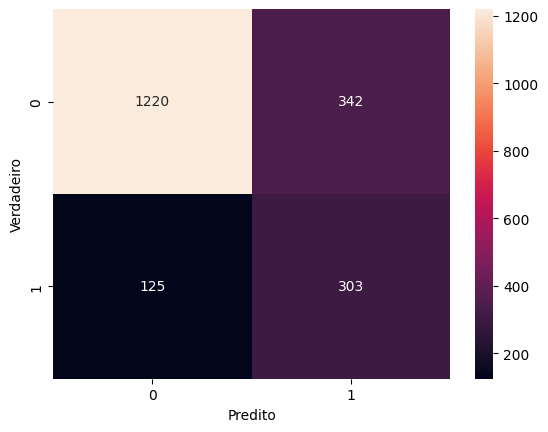

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []

for i in range(5):
    tf.keras.backend.clear_session()
    model = create_InceptionV3()
    historys.append(train_model(model, X_train, Y_train, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão Classe 1: {precisao_classe_1}")
    print(f"Recall Classe 1: {recall_classe_1}")
    print(f"F1-Score Classe 1: {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()